In [119]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode
import matplotlib.animation as animation
%matplotlib inline
from numpy.fft import fft, fftfreq, ifft

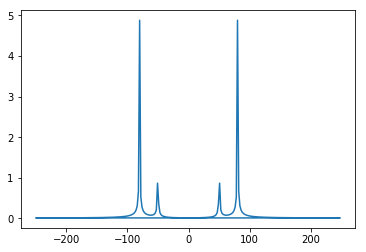

In [120]:
N = 256
dt= 1/500
t = np.linspace(0, N*dt, N)

y = np.sin(50.0 * 2.0*np.pi*t) + 5*np.sin(80.0 * 2.0*np.pi*t)
freq = np.fft.fftfreq(N)/dt
yhat = np.fft.fft(y)

fig = plt.figure()

plt.plot(freq, 2.0/N *abs(yhat))

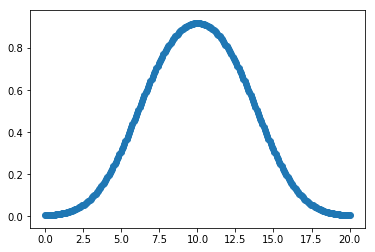

In [121]:
## Equation de la chaleur

#Coéfficients physiques
K=.5 #coefficient diffusion


## Time
n_t=100
tf = 200
dt = tf/(n_t-1)
T = np.linspace(0,tf,n_t)

## Space
n_x = 2**8
xf = 20
dx = xf/(n_x-1)
X = np.linspace(0,xf,n_x)

## Frequency
freq = np.fft.fftfreq(n_x)/dx


mu0 = np.zeros(n_x)
mu0[n_x//2 -50 : n_x//2 +50]= 1
mu0hat = np.fft.fft(mu0)
mu= np.zeros((n_t,n_x),dtype=complex)
muhat = np.zeros((n_t,n_x),dtype=complex)

for i in range(n_t):
    muhat[i,:]=np.exp(-(freq**2)*i*K*dt)*mu0hat
    mu[i,:]=np.fft.ifft(muhat[i,:]).real

plt.scatter(X,mu[n_t-1,:])

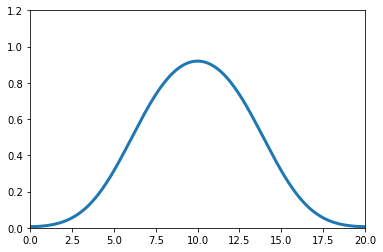

In [122]:
fig = plt.figure()
ax = plt.axes(xlim=(0, xf), ylim=(0, 1.2))
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    line.set_data(X,mu.real[i,:])
    return line,

ani = animation.FuncAnimation(fig, animate,init_func=init,frames= n_t-1, interval=50, blit=True)

from IPython.display import HTML
HTML(ani.to_jshtml())

In [214]:
## Equation Champignons

#Coéfficients physiques
K=10 #coefficient diffusion
b=.2 # dtC=-b*rho*C
F0= 1 # dtRho = Fo*Mu

## Time
n_t=10000
tf = 30
dt = tf/(n_t-1)
T = np.linspace(0,tf,n_t)

## Space
n_x = 2**10
xf = 150
dx = xf/(n_x-1)
X = np.linspace(0,xf,n_x)

## Frequency
freq = np.fft.fftfreq(n_x)/dx

#Initial Values
rho0 = np.zeros(n_x)
c0 = np.ones(n_x)
mu0 = np.zeros(n_x)
mu0[(n_x//2):(n_x//2+10)]=1

mu0hat = fft(mu0)

In [215]:
mu, rho, c, muhat = mu0, rho0, c0, mu0hat
Mu, Rho, C , Muhat= [mu0],[rho0],[c0],[mu0hat]
foo = 1/(K*dt*(freq**2)+1)
for t in range(n_t):
    muhat = foo*(muhat+dt*fft(c*mu+c*rho-rho*mu))
    mu = ifft(muhat).real
    rho = rho + dt*F0*mu
    c = c/(1+dt*b*rho)
    Mu+=[mu]
    Rho+=[rho]
    C += [c]
    Muhat +=[muhat]

/home/ltoran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in multiply
  """
/home/ltoran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


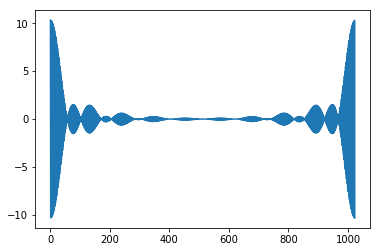

In [216]:
plt.plot(Muhat[10].real)

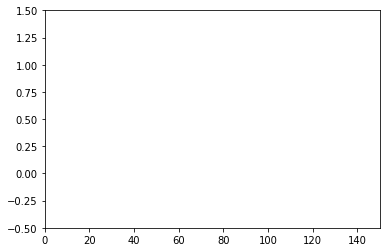

In [217]:
secs = 5
fps = 30
frn = fps * secs

fig = plt.figure()
ax = plt.axes(xlim=(0, xf), ylim=(-.5, 1.5))
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    line.set_data(X,Mu[i*n_t//frn])
    return line,

ani = animation.FuncAnimation(fig, animate,init_func=init,frames=frn, interval=1000/fps, blit=True)

from IPython.display import HTML
HTML(ani.to_jshtml())